In [110]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
img = cv2.imread('C:/Users/Surjya/Image classification/model/test_images/download (1).jpeg')
img.shape

(225, 225, 3)

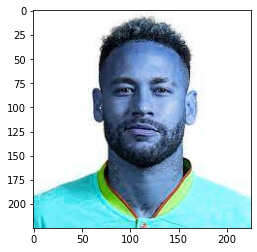

In [112]:
plt.imshow(img)

In [113]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [114]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [225, 206, 179, ..., 233, 232, 236],
       [223, 210, 177, ..., 232, 231, 235],
       [215, 223, 185, ..., 232, 232, 234]], dtype=uint8)

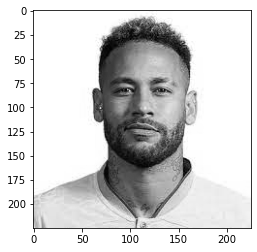

In [115]:
plt.imshow(gray, cmap='gray')

In [116]:
face_cascade = cv2.CascadeClassifier('C:/Users/Surjya/Image classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Surjya/Image classification/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 62,  42, 104, 104]])

In [117]:
(x,y,w,h) = faces[0]
x,y,w,h

(62, 42, 104, 104)

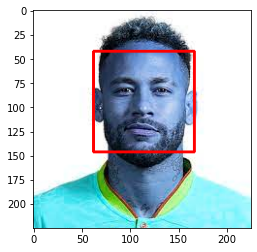

In [118]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

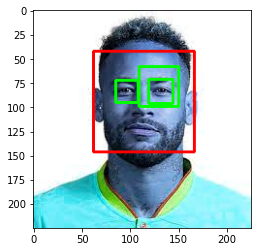

In [119]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

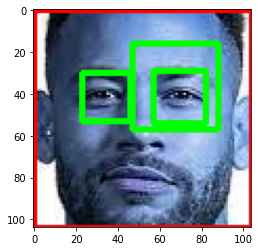

In [120]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [121]:
cropped_img = np.array(roi_color)
cropped_img.shape

(104, 104, 3)

In [122]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions...which is convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #Process  Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

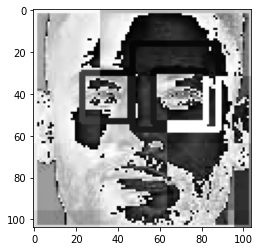

In [123]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [124]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

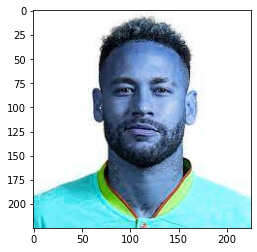

In [125]:
original_image = cv2.imread('C:/Users/Surjya/Image classification/model/test_images/download (1).jpeg')
plt.imshow(original_image)

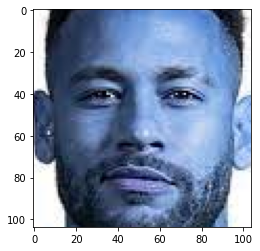

In [126]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Surjya/Image classification/model/test_images/download (1).jpeg')
plt.imshow(cropped_image)

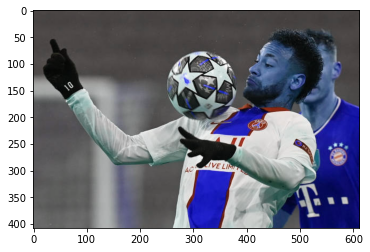

In [127]:
org_image_obstructed = cv2.imread('C:/Users/Surjya/Image classification/model/test_images/Neymar_P_26.jpg')
plt.imshow(org_image_obstructed)

In [128]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/Surjya/Image classification/model/test_images/Neymar_P_26.jpg')
cropped_image_no_2_eyes

In [129]:
path_to_data = "C:/Users/Surjya/Image classification/model/dataset/"
path_to_cr_data = "C:/Users/Surjya/Image classification/model/dataset/cropped/"

In [130]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [131]:
img_dirs

['C:/Users/Surjya/Image classification/model/dataset/cropped',
 'C:/Users/Surjya/Image classification/model/dataset/Leo_messi',
 'C:/Users/Surjya/Image classification/model/dataset/Neymar',
 'C:/Users/Surjya/Image classification/model/dataset/Ronaldo']

In [132]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [133]:
cropped_image_dirs = []
image_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    image_name = img_dir.split('/')[-1]
    print(image_name)
    
    image_file_names_dict[image_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + image_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = image_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            image_file_names_dict[image_name].append(cropped_file_path)
            count += 1

cropped
Leo_messi
Generating cropped images in folder:  C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi
Neymar
Generating cropped images in folder:  C:/Users/Surjya/Image classification/model/dataset/cropped/Neymar
Ronaldo
Generating cropped images in folder:  C:/Users/Surjya/Image classification/model/dataset/cropped/Ronaldo


In [134]:
image_file_names_dict = {}
for img_dir in cropped_image_dirs:
    image_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    image_file_names_dict[image_name] = file_list
image_file_names_dict

{'Leo_messi': ['C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi1.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi10.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi100.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi101.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi102.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi103.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi104.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi105.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi106.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_messi\\Leo_messi107.png',
  'C:/Users/Surjya/Image classification/model/dataset/cropped/Leo_mess

In [135]:
class_dict = {}
count = 0
for image_name in image_file_names_dict.keys():
    class_dict[image_name] = count
    count = count + 1
class_dict

{'Leo_messi': 0, 'Neymar': 1, 'Ronaldo': 2}

In [136]:
X, y = [], []
for image_name, training_files in image_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[image_name])

In [137]:
len(X[0])

4096

In [138]:
32*32*3 + 32*32

4096

In [139]:
X[0]

array([[ 69],
       [136],
       [ 97],
       ...,
       [133],
       [244],
       [ 77]], dtype=uint8)

In [140]:
y[0]

0

In [141]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(487, 4096)

In [142]:
X[0]

array([ 69., 136.,  97., ..., 133., 244.,  77.])

In [143]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.819672131147541

In [145]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.92      0.68      0.78        34
           2       0.82      0.90      0.86        50

    accuracy                           0.82       122
   macro avg       0.83      0.81      0.81       122
weighted avg       0.83      0.82      0.82       122



In [146]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [147]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [148]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.868493,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.569863,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.882192,{'logisticregression__C': 1}


In [149]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [150]:
best_estimators['svm'].score(X_test,y_test)

0.8278688524590164

In [151]:
best_estimators['random_forest'].score(X_test,y_test)

0.5409836065573771

In [152]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8770491803278688

In [153]:
best_clf = best_estimators['logistic_regression']

In [154]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[32,  2,  4],
       [ 0, 29,  5],
       [ 1,  3, 46]], dtype=int64)

Text(69.0, 0.5, 'Truth')

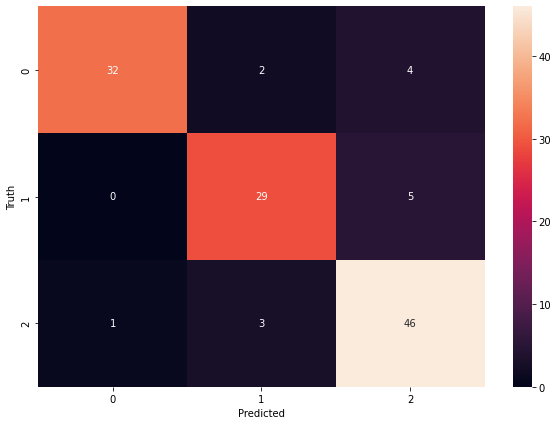

In [155]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [156]:
!pip install joblib
import joblib
#save our model as a pickle in a file.... it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [157]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))